## Building an Image Classifier Using the Sequential API in keras.

### Sequential API is the easiest model to build and run in Keras. A sequential model allows us to create models layer by layer in a step by step fashion.

- **Keras** provide some datasets, which can be loaded in using Keras directly. 
- We will use the **Fashion** **MNIST** dataset of fashion categories. It has 60,000 of 28x28 grayscale images of the 10 fashion items as a training set, along with a test set of 10,000 images.

In [ ]:
import os
import numpy as np
import pandas as pd

from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Dataset

In [ ]:
mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_test.shape, x_train.shape

((10000, 28, 28), (60000, 28, 28))

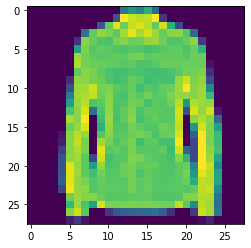

In [ ]:
# random instance in test dataset
plt.imshow(x_test[26])

### In Fashion Mnist we are dealing with 10 different classes of fashion elements 

0  ->  T-shirt/top <br>
1  ->  Trouser<br>
2  ->  Pullover<br>
3  ->  Dress<br>
4  ->  Coat<br>
5  ->  Sandal<br>
6  ->  Shirt<br>
7  ->  Sneaker<br>
8  ->  Bag<br>
9  ->  Ankle boot<br>

In [ ]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot" ]

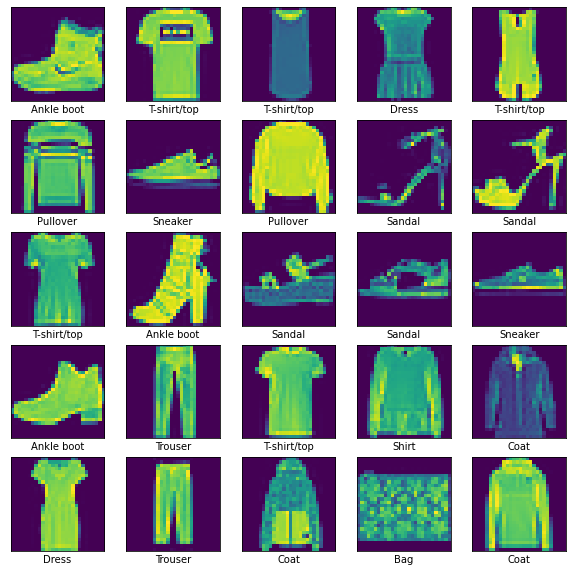

In [ ]:
plt.figure(figsize=(10,10)) # create an empty figure
for i in range(25): # loop through first 25 rows
    plt.subplot(5,5,i+1) # create a 5x5 subplot and iterate through each
    plt.xticks([]) # removing the ticks on x-axis
    plt.yticks([]) # removing the ticks on y-axis
    plt.grid(False) # disabling the grid
    
    # before plotting the image
    # the image is reshape into 28x28 shape
    # this is because the original data is a single 1d array with 784 columns 
    # each indicating a pixel value
    
    plt.imshow(x_train[i].reshape(28, 28)) 
    plt.xlabel(classes[y_train[i]]) # assigning the labels
plt.show() 

In [ ]:
# testing classes
for i in range(4):
    print(classes[y_train[i]], end = ", ")

Ankle boot, T-shirt/top, T-shirt/top, Dress, 

- Since we will be using Stochastic Gradient Descent to train our neural network, lets create a cross validation set.

- Also we need to scale dataset, so we will divide training set with 255.0 to scale pixel intensities in the same range of **0 to 1** which also converts them into floats.

In [ ]:
# Scaling the dataset
x_train = x_train[:]/ 255.0
x_test = x_test / 255.0

In [ ]:
# Creating cross-validation set
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [ ]:
x_val.shape, x_train.shape

((12000, 28, 28), (48000, 28, 28))

## Sample image after Scaling

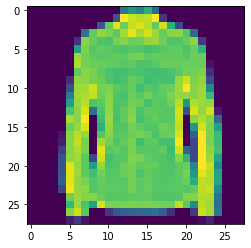

In [ ]:
plt.imshow(x_test[26])

## Creating an Image classification model using Sequential model


let's create a linear model for a working base model to make future imporvements in it. The model is having one flatten (28X28) input layer and 2 fully connected dense layers.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
model1 = Sequential([
                     
       Flatten(),
       Dense(units=150, activation='relu', name='Dense1'),
       Dense(units=10, activation='softmax', name='Dense2')
])


## Bulding the Model

## Model 1
- In this basic model we will use **Stochastic Gradient Descent (sgd)** optimizer.
- Here we are targeting integers instead of categorical vectors as targets, so we can use **sparse_categorical_crossentropy**.<br>

- It’s an integer-based version of the categorical crossentropy loss function, which means that we don’t have to convert the targets into categorical format anymore.

In [ ]:
model1.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## List of Layers

In [ ]:
model1.layers

In [ ]:
model1.layers[2].name

'Dense2'



## Training and Evaluating the Model


In [ ]:
Train = model1.fit(
                  x_train, 
                  y_train, 
                  epochs=20,
                  validation_data = (x_val, y_val)
)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7745 - accuracy: 0.7520 - val_loss: 0.5806 - val_accuracy: 0.8076
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5357 - accuracy: 0.8195 - val_loss: 0.5073 - val_accuracy: 0.8294
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4873 - accuracy: 0.8334 - val_loss: 0.4691 - val_accuracy: 0.8414
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4602 - accuracy: 0.8421 - val_loss: 0.4424 - val_accuracy: 0.8475
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4418 - accuracy: 0.8464 - val_loss: 0.4263 - val_accuracy: 0.8525
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4269 - accuracy: 0.8529 - val_loss: 0.4247 - val_accuracy: 0.8519
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4144 - accuracy: 0.8575 - val_loss: 0.4151 - val_accuracy:

### Model Performance plot

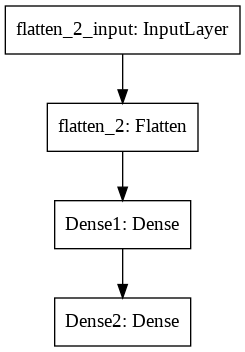

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model1)

(0.0, 1.0)

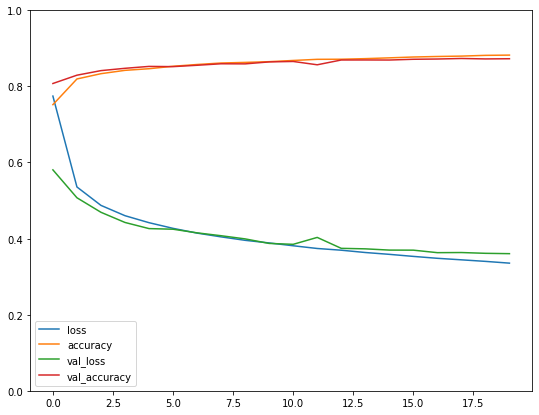

In [ ]:
import pandas as pd
hist = pd.DataFrame(Train.history).plot(figsize=(9, 7))
hist.set_ylim(0, 1) 

## Model Evaluation

- Here we will evaluate  the model  on  the  test  set  to  estimate  the  generalization  error.

In [ ]:
model1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3942 - accuracy: 0.8603


[0.3941950798034668, 0.8603000044822693]

## Making Predictions 

In [ ]:
model1.predict(x_test[:5]).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.12, 0.  , 0.81],
       [0.  , 0.  , 0.95, 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.21, 0.  , 0.03, 0.01, 0.02, 0.  , 0.73, 0.  , 0.  , 0.  ]],
      dtype=float32)

#### Let's compatre a random value with prediction


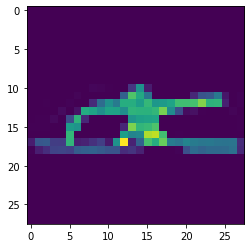

In [ ]:
plt.imshow(x_test[52])

In [ ]:
model1.predict(x_test[52:53]).round(2)

array([[0.  , 0.  , 0.  , 0.01, 0.  , 0.88, 0.01, 0.09, 0.  , 0.01]],
      dtype=float32)

In [ ]:
classes[5]

'Sandal'

## We can use early Stopping if we want to get particular value of accuracy.

In [ ]:
"""
class Early_Stop(keras.callbacks.Callback):
    def on_epoch(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.8788):
            print("\nReached 85% Accuracy, so Stopping the training.. \n")
            self.model.stop_training = True

Callback = Early_Stop()
model.fit(x_train, y_test, epochs=20, callback=[callback])

"""

# Sucessfully Create a Classifier.